In [30]:
import torch

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [32]:
data.shape

(400, 9)

In [33]:
#Exploring data present in table
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [37]:
#Removing unwanted columns
data = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']]

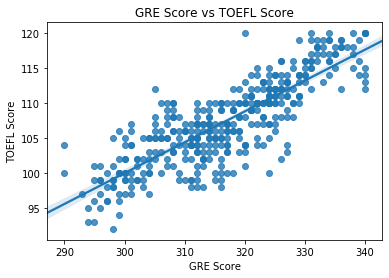

In [39]:
plt.figure()

#Plotting scatter plot with regression line to see any relation between GRE vs TOEFL Scores
fig = sns.regplot( x = 'GRE Score', y = 'TOEFL Score', data = data)
plt.title('GRE Score vs TOEFL Score')

plt.show()

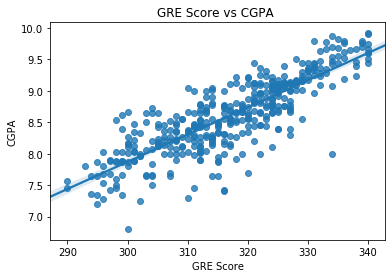

In [40]:
plt.figure()

#Plotting scatter plot with regression line using seaborn to observe any relation between GRE vs CGPA
fig = sns.regplot( x = 'GRE Score', y = 'CGPA', data = data)
plt.title('GRE Score vs CGPA ')

plt.show()

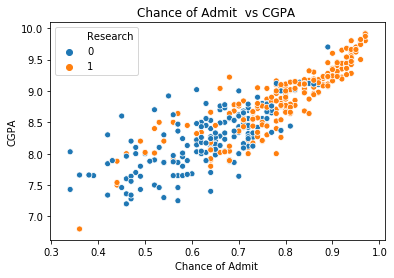

In [42]:
plt.figure()

fig = sns.scatterplot( x = 'Chance of Admit ', y = 'CGPA', data = data, hue = 'Research')
plt.title('Chance of Admit  vs CGPA ')

plt.show()

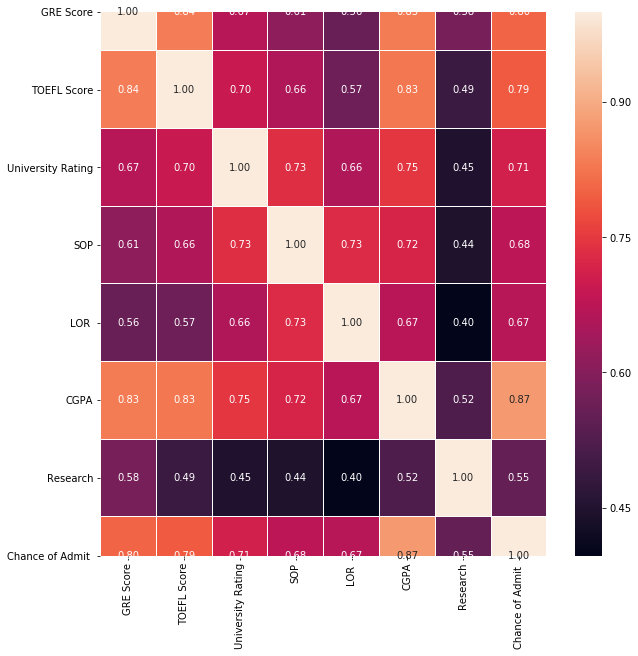

In [44]:
plt.figure(figsize = (10,10))

#plotting correlation between every pair graph
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt='.2f')

plt.show()

In [45]:
#data preprocessing
from sklearn import preprocessing

In [49]:
#standardize the data
data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']] = preprocessing.scale(data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']])         

In [50]:
data.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
224,-1.030386,-0.397564,2,-0.397769,-1.618648,-0.619447,0,0.67
347,-1.553979,-2.212170,1,-2.386613,-2.733036,-2.113811,0,0.42
99,0.540391,0.922150,3,0.596653,0.610127,0.471942,1,0.79
248,0.627656,0.427257,3,0.099442,0.610127,0.455151,1,0.80
117,-2.339367,-0.562528,4,-1.392191,-1.061454,-1.912324,0,0.45


In [51]:
col = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']
features = data[col]

In [53]:
features.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,1.762107,1.746971,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029


In [57]:
target = data[['Chance of Admit ']]

In [58]:
target.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [60]:
y = target.copy()

In [62]:
y.replace(to_replace = target[target >= 0.80], value = int(2), inplace = True)
y.replace(to_replace = target[target >= 0.60], value = int(1), inplace = True)
y.replace(to_replace = target[target < 0.80], value = int(0), inplace = True)

In [63]:
target = y

In [66]:
target['Chance of Admit '].unique()

array([2., 1., 0.])

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

In [71]:
xtrain = torch.from_numpy(x_train.values).float()
xtest = torch.from_numpy(x_test.values).float()

In [72]:
xtrain.shape

torch.Size([320, 5])

In [73]:
ytrain = torch.from_numpy(y_train.values).view(1,-1)[0].long()
ytest = torch.from_numpy(y_test.values).view(1,-1)[0].long()

In [74]:
import torch.nn as nn
import torch.nn.functional as f

In [75]:
input_size = xtrain.shape[1]

output_size = len(target['Chance of Admit '].unique())

In [76]:
class Net(nn.Module):
    
    def __init__(self, hidden_size, activation_fn='relu', apply_dropout=False):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
        self.hidden_size = hidden_size
        self.activation_fn = activation_fn
        
        self.dropout = None
        if apply_dropout:
            self.dropout = nn.Dropout(0.2)
            
    def forward(self, x):
        
        activation_fn = None
        if self.activation_fn == 'sigmoid':
            activation_fn = f.torch.sigmoid
            
        elif self.activation_fn == 'tanh':
            activation_fn = f.torch.tanh
            
        elif self.activation_fn == 'relu':
            activation_fn = f.torch.relu
            
        
        x = activation_fn(self.fc1(x))
        x = activation_fn(self.fc2(x))
        
        if self.dropout != None:
            x = self.dropout(x)
            
        x = self.fc3(x)
        
        return f.log_softmax(x, dim = -1)

In [77]:
import torch.optim as optim

In [99]:
def train_and_evaluate_model(model, learn_rate = 0.001):
    epoch_data = []
    epochs = 1001
    
    optimizer = optim.Adam(model.parameters(), lr = learn_rate)
    
    loss_fn = nn.NLLLoss()
    
    test_accuracy = 0.0
    for epoch in range(1, epochs):
        
        
        optimizer.zero_grad()
        
        model.train()
        
        ypred = model(xtrain)
        
        loss = loss_fn(ypred, ytrain)
        loss.backward()
        
        optimizer.step()
        
        model.eval()
        
        ypred_test = model(xtest)
        loss_test = loss_fn(ypred_test, ytest)
        
        _, pred = ypred_test.data.max(1)
        
        test_accuracy = pred.eq(ytest.data).sum().item()/y_test.values.size
        
        epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), test_accuracy])
        
        if epoch%100 == 0:
            
            print ('Test accuracy - %.4f'%(test_accuracy))
        
    return {'model': model,
            'epoch_data': epoch_data,
            'num_epochs': epochs,
            'optimizer': optimizer,
            'loss_fn': loss_fn,
            'test_accuracy': test_accuracy,
            '_, pred': ypred_test.data.max(1),
            'actual_test_label': ytest,
           }

In [100]:
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=False)

net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)

In [101]:
result_sigmoid = train_and_evaluate_model(net)

Test accuracy - 0.3500
Test accuracy - 0.3500
Test accuracy - 0.3500
Test accuracy - 0.4875
Test accuracy - 0.4875
Test accuracy - 0.4875
Test accuracy - 0.4875
Test accuracy - 0.4875
Test accuracy - 0.4875
Test accuracy - 0.4875


In [113]:
net1 = Net(hidden_size=50, activation_fn='sigmoid', apply_dropout=True)

In [114]:
result_sigmoid_2 = train_and_evaluate_model(net1)

Test accuracy - 0.7250
Test accuracy - 0.7500
Test accuracy - 0.7500
Test accuracy - 0.7375
Test accuracy - 0.7250
Test accuracy - 0.7250
Test accuracy - 0.7250
Test accuracy - 0.7250
Test accuracy - 0.7250
Test accuracy - 0.7250


In [104]:
net2 = Net(hidden_size=50, activation_fn='tanh')

In [105]:
result_tanh = train_and_evaluate_model(net2)

Test accuracy - 0.7375
Test accuracy - 0.7375
Test accuracy - 0.7375
Test accuracy - 0.7250
Test accuracy - 0.7000
Test accuracy - 0.6875
Test accuracy - 0.7375
Test accuracy - 0.7625
Test accuracy - 0.7250
Test accuracy - 0.7125


In [108]:
net3 = Net(hidden_size=1000, activation_fn='tanh', apply_dropout=True)

In [109]:
result_tanh = train_and_evaluate_model(net3)

Test accuracy - 0.7250
Test accuracy - 0.7250
Test accuracy - 0.7250
Test accuracy - 0.7125
Test accuracy - 0.6875
Test accuracy - 0.6875
Test accuracy - 0.6875
Test accuracy - 0.7000
Test accuracy - 0.6875
Test accuracy - 0.6875


In [111]:
net4 = Net(hidden_size=50, activation_fn='relu', apply_dropout=True)

In [112]:
result_relu = train_and_evaluate_model(net4)

Test accuracy - 0.7250
Test accuracy - 0.7125
Test accuracy - 0.7125
Test accuracy - 0.7125
Test accuracy - 0.7000
Test accuracy - 0.7000
Test accuracy - 0.6875
Test accuracy - 0.6750
Test accuracy - 0.6875
Test accuracy - 0.6750


In [116]:
df_epochs_data = pd.DataFrame(result_sigmoid_2['epoch_data'], columns=['epoch', 'train_loss', 'test_loss', 'accuracy'])
df_epochs_data

,epoch,train_loss,test_loss,accuracy
0,1,1.069231,1.052956,0.4875
1,2,1.063089,1.043936,0.4875
2,3,1.054849,1.036096,0.4875
3,4,1.042668,1.029365,0.4875
4,5,1.026801,1.023612,0.4875
...,...,...,...,...
995,996,0.404788,0.559308,0.7250
996,997,0.416696,0.559279,0.7250
997,998,0.407260,0.558881,0.7250
998,999,0.402128,0.558586,0.7250


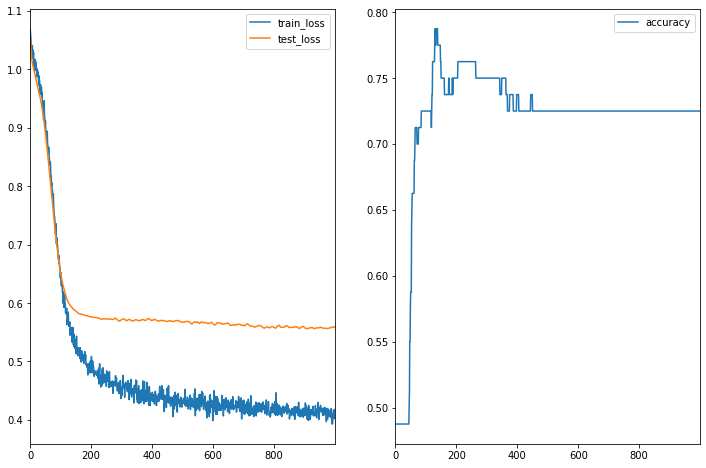

In [117]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

df_epochs_data[['train_loss', 'test_loss']].plot(ax=ax1)
df_epochs_data[['accuracy']].plot(ax=ax2)

plt.show()